In [1]:
import numpy as np #
import pandas as pd 
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
data=pd.read_csv("marketing_campaign.csv",sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(len(data.columns))
data.columns

29


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data.shape

(2240, 29)

In [6]:
data.Income

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [7]:
# remove the data which has null values in the income
tran_data= data.copy()
tran_data = tran_data[tran_data['Income'].notnull()]
tran_data.shape

(2216, 29)

In [8]:
tran_data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"])
tran_data["Dt_Customer"]

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [9]:
tran_data['Year'] = tran_data['Dt_Customer'].apply(lambda row:row.year)

In [10]:
tran_data['Children'] = tran_data['Kidhome']+ tran_data['Teenhome']
tran_data['Age'] = pd.Timestamp('now').year- tran_data['Year_Birth']
tran_data = tran_data.drop(['ID','Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Year', 'Year_Birth'], axis=1)

print(tran_data.shape)

(2216, 24)


In [11]:
tran_data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,1,0,65
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,0,2,68
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,4,0,0,0,0,0,0,0,0,57
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,6,0,0,0,0,0,0,0,1,38
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,5,0,0,0,0,0,0,0,1,41


In [12]:
tran_data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [13]:
tran_data.Education = tran_data.Education.replace(['PhD','Graduation', 'Master'], 'fully_Graduated')

tran_data.Education = tran_data.Education.replace(['Basic', '2n Cycle'], 'under_Graduated')
tran_data['Education'].value_counts()

fully_Graduated    1962
under_Graduated     254
Name: Education, dtype: int64

In [14]:
tran_data['Marital_Status'].value_counts()


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
tran_data.Marital_Status = tran_data.Marital_Status.replace(['Married','Together'], 'Partner')

tran_data.Marital_Status = tran_data.Marital_Status.replace(['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], 'Single')
tran_data['Marital_Status'].value_counts()


Partner    1430
Single      786
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Income'>

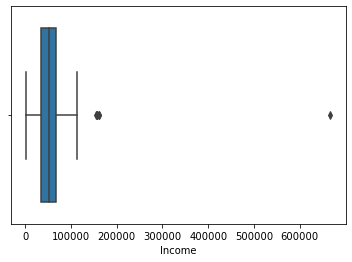

In [16]:
sns.boxplot(tran_data['Income'])

In [17]:
tran_data=tran_data[tran_data['Income']<200000]
tran_data.shape

(2215, 24)

In [18]:
cols = [i for i in tran_data.columns if str(i).startswith('Mnt')]
print(cols)
tran_data['Expense'] = tran_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
tran_data=tran_data.drop(cols, axis=1)
tran_data['Expense']

['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expense, Length: 2215, dtype: int64

In [19]:
xgb_data = tran_data.copy()
cols_response= [i for i in tran_data.columns if str(i).startswith('Accept')]
print(cols_response)
xgb_data[cols_response]

['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


In [20]:
tran_data['Responses'] = tran_data[cols_response].sum(axis = 1)

# if there is any responses it would be 1 otherwise it would be 0
def mapp(num):
    if num >=1:
        result = 1
    else:
        result = 0
    return result


tran_data['Responses'] = tran_data['Responses'].apply(mapp)
tran_data= tran_data.drop(cols_response, axis=1)
tran_data['Responses'].value_counts()

0    1756
1     459
Name: Responses, dtype: int64

In [21]:
tran_data.head().T

,0,1,2,3,4
Education,fully_Graduated,fully_Graduated,fully_Graduated,fully_Graduated,fully_Graduated
Marital_Status,Single,Single,Partner,Partner,Partner
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58,38,26,26,94
NumDealsPurchases,3,2,1,2,5
NumWebPurchases,8,1,8,2,5
NumCatalogPurchases,10,1,2,0,3
NumStorePurchases,4,2,10,4,6
NumWebVisitsMonth,7,5,4,6,5
Complain,0,0,0,0,0


In [22]:
# Replacing the age with the age groups

def age_category(age):
    if  25<=age <= 35:
        age = 0
    elif 35 < age <= 45:
        age = 1
    elif 45 < age <= 55:
        age = 2
    elif 55 < age <= 65:
        age = 3
    elif 65 < age <= 75:
        age = 4
    elif age > 75:  
        age = 5
    return age  

tran_data.Age = tran_data.Age.apply(age_category)
tran_data.Age.unique()

xgb_data.Age = xgb_data.Age.apply(age_category)
xgb_data.Age.unique()

array([3, 4, 1, 2, 0, 5], dtype=int64)

In [23]:
#Dropping unwanted Columns 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
drop_cols= ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
tran_data.drop(drop_cols, axis = 1,inplace = True)
xgb_data.drop(drop_cols, axis = 1,inplace = True)

In [24]:
#scaling numerical and categorical data
cat_cols= tran_data.select_dtypes('object').columns 
print(cat_cols)
tran_data =pd.get_dummies(columns=cat_cols,data=tran_data)
xgb_data =pd.get_dummies(columns=cat_cols,data=xgb_data)

Index(['Education', 'Marital_Status'], dtype='object')


<AxesSubplot:>

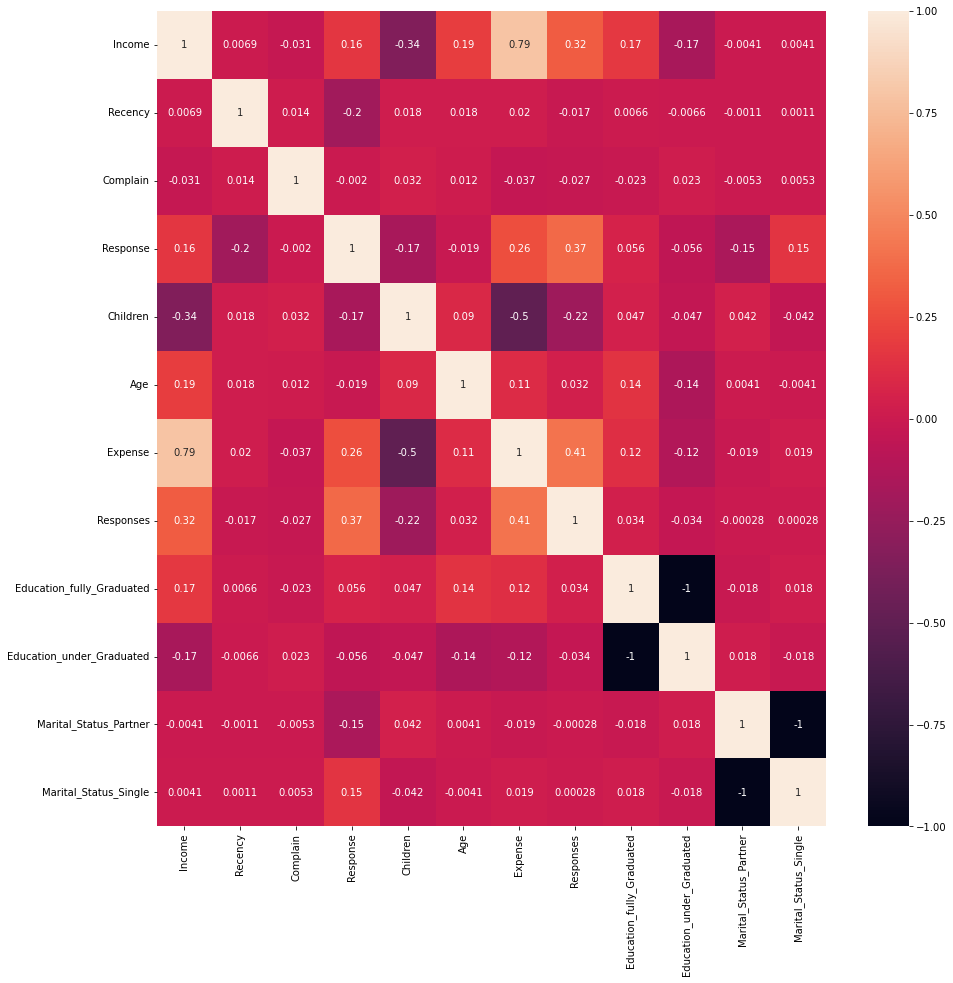

In [25]:
plt.figure(figsize= (15,15))
sns.heatmap(tran_data.corr(), annot=True)

In [26]:
tran_data.nunique()

Income                       1973
Recency                       100
Complain                        2
Response                        2
Children                        4
Age                             6
Expense                      1047
Responses                       2
Education_fully_Graduated       2
Education_under_Graduated       2
Marital_Status_Partner          2
Marital_Status_Single           2
dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
to_scale= ['Income', 'Recency', 'Expense']
X_Scaled =StandardScaler().fit_transform(tran_data[to_scale])
X_Scaled[:5,:]

array([[ 0.28660409,  0.31011292,  1.67501109],
       [-0.26140705, -0.38089872, -0.96272705],
       [ 0.91272331, -0.79550571,  0.2798301 ],
       [-1.17667951, -0.79550571, -0.91959423],
       [ 0.29380621,  1.55393388, -0.3074399 ]])

In [28]:
X_Scaled =pd.DataFrame(X_Scaled, columns =to_scale)
final_data = pd.concat((tran_data.drop(to_scale, axis=1), X_Scaled), axis=1)
final_data.head()

,Complain,Response,Children,Age,Responses,Education_fully_Graduated,Education_under_Graduated,Marital_Status_Partner,Marital_Status_Single,Income,Recency,Expense
0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.286604,0.310113,1.675011
1,0.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,-0.261407,-0.380899,-0.962727
2,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.912723,-0.795506,0.279830
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.176680,-0.795506,-0.919594
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.293806,1.553934,-0.307440


In [29]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2215 non-null   float64
 1   Recency                    2215 non-null   int64  
 2   Complain                   2215 non-null   int64  
 3   Response                   2215 non-null   int64  
 4   Children                   2215 non-null   int64  
 5   Age                        2215 non-null   int64  
 6   Expense                    2215 non-null   int64  
 7   Responses                  2215 non-null   int64  
 8   Education_fully_Graduated  2215 non-null   uint8  
 9   Education_under_Graduated  2215 non-null   uint8  
 10  Marital_Status_Partner     2215 non-null   uint8  
 11  Marital_Status_Single      2215 non-null   uint8  
dtypes: float64(1), int64(7), uint8(4)
memory usage: 228.9 KB


In [30]:
final_data.dropna(inplace=True)

In [31]:
features = ['Income', 'Age', 'Expense']

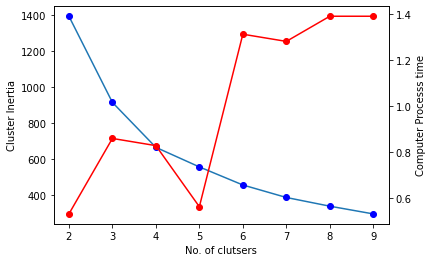

In [32]:
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

WCSS=[]
tim=[]
k=[]
model=None
for i in range(2,10):
    
    k.append(i)
    st=time.process_time()
    model = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(final_data[['Income', 'Expense']])
    end=time.process_time()
    WCSS.append(model.inertia_)
    tim.append(end-st)

fig,ax=plt.subplots()
ax.plot(k,WCSS)
ax.set_xlabel("No. of clutsers")
ax.set_ylabel("Cluster Inertia")
plt.plot(k,WCSS,'bo') 
ax2=ax.twinx()
plt.plot(k,tim,'r',marker='o')
ax2.set_ylabel("Computer Processs time")
plt.show()

In [33]:
model = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(final_data[['Income', 'Expense']])
preds = model.predict(final_data[['Income', 'Expense']])
dt_Kmeans = final_data[['Income','Expense']]
dt_Kmeans['Cluster'] = preds

Text(0.5, 1.0, 'PLot Showing Income distribution for different clusters')

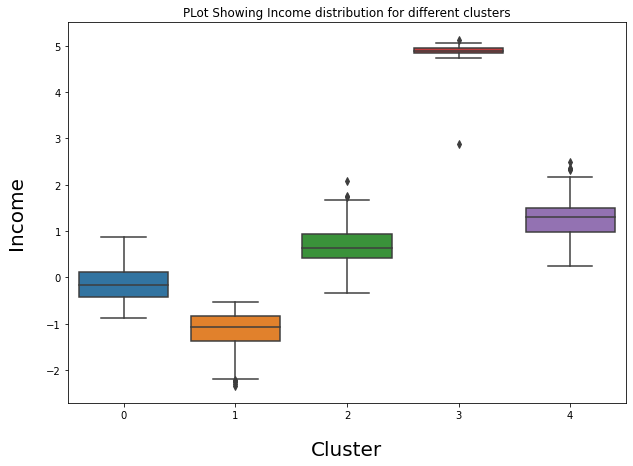

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dt_Kmeans, x='Cluster', y = 'Income');
plt.xlabel('Cluster', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)
plt.title("PLot Showing Income distribution for different clusters")

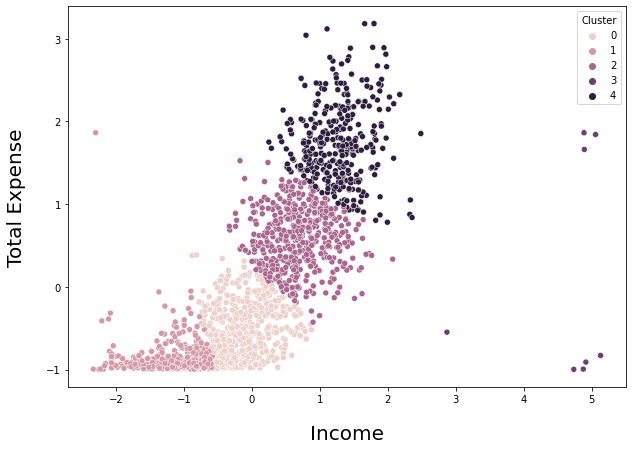

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dt_Kmeans, x='Income', y='Expense', hue='Cluster');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Expense', fontsize=20, labelpad=20);